## **TSF GRIP Data Science & Business Analytics**


## Task 6 : Prediction using Decision Tree Algorithm (Level - Intermediate)


*   Create the Decision Tree classifier and visualize it graphically.
*   The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.
*   Dataset : https://bit.ly/3kXTdox


### Author: **ASHWANI PRASAD**


In [65]:
# Loading the given Iris.csv dataset which I kept on my Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
# Importing libraries in Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Loading the iris dataset as given in Task #6 description
Iris_data=pd.read_csv('/content/drive/MyDrive/Iris.csv')

#Checking top 10 records of the given dataset.
print(Iris_data.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [68]:
#Basic information regarding the data
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [69]:
#Describe function gives the basic numerical info about data for each numeric feature..
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [70]:
#Data points count value for each class labels..
Iris_data.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

**Visualizing Iris Data**

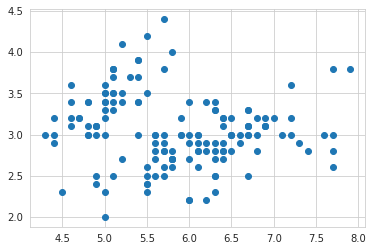

In [71]:
#Visualizing the dataset features to find pattern to solve our task

plt.scatter(Iris_data['SepalLengthCm'], Iris_data['SepalWidthCm'])
plt.show()

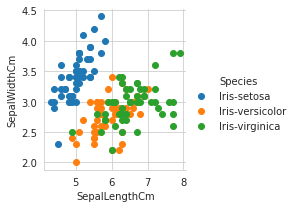

In [72]:
#Using Seaborn library to visualize 2 features based on target variable.

sns.set_style('whitegrid')
sns.FacetGrid(Iris_data, hue = 'Species')\
    .map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm') \
    .add_legend()

plt.show()

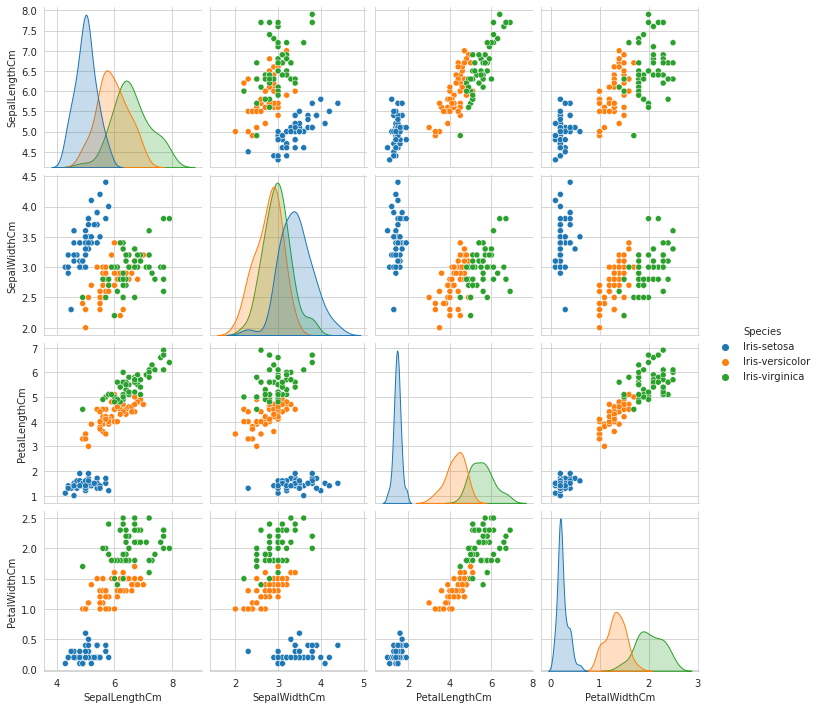

In [73]:
#Pair plot gives the relationship between all features distribution with each other.

sns.pairplot(Iris_data.drop(['Id'], axis=1), hue='Species')
plt.show()

**Exploring Some New Features**

In [74]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm'] - Iris_data['SepalWidthCm']
Iris_data['Petal_diff'] = Iris_data['PetalLengthCm'] - Iris_data['PetalWidthCm']

In [75]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm'] - Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_width_diff'] = Iris_data['SepalWidthCm'] - Iris_data['PetalWidthCm']


In [76]:
Iris_data['Sepal_petal_len_width_diff'] = Iris_data['SepalLengthCm'] - Iris_data['PetalWidthCm']
Iris_data['Sepal_petal_width_len_diff'] = Iris_data['SepalWidthCm'] - Iris_data['PetalLengthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,Petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_width_diff,Sepal_petal_width_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


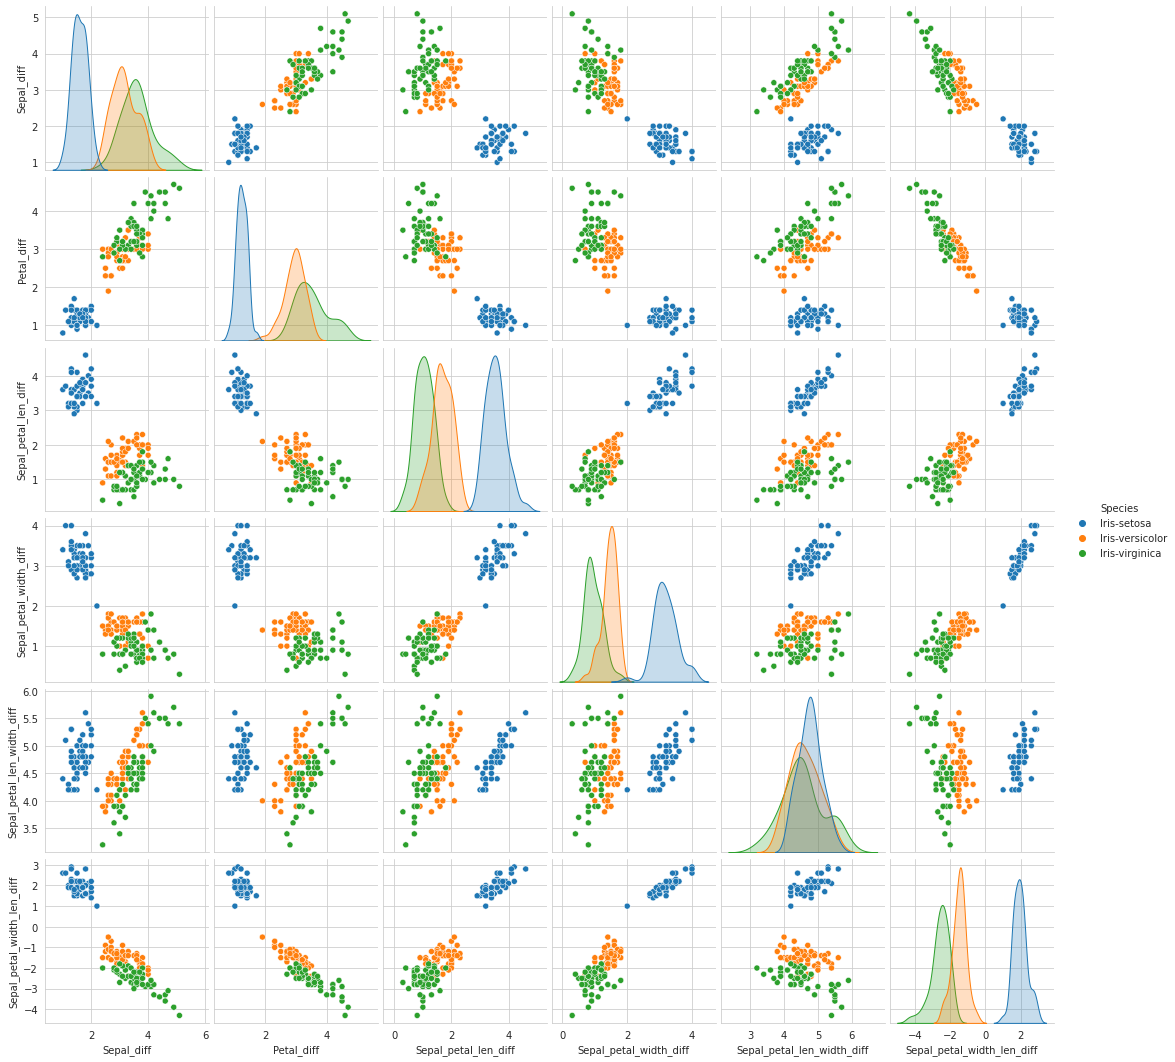

In [77]:
#Finding relationship between new features based on class labels...

sns.pairplot(Iris_data[['Species', 'Sepal_diff', 'Petal_diff', 'Sepal_petal_len_diff', 
                        'Sepal_petal_width_diff','Sepal_petal_len_width_diff','Sepal_petal_width_len_diff']], hue='Species')
plt.show()

**Building Classification Model based on DECISION TREE ALGORITHM**

In [78]:
# Droping Id column as it is of no use in classifying the class labels..
Iris_data.drop(['Id'], axis=1,inplace=True)

In [79]:
#Importing few libraries for creating Decision Tree Classifier and visualizing the tree structure
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

In [80]:
# Import necessary library for graph viz  
from sklearn.tree import export_graphviz

In [81]:
# Seperating independant variables or target variables from Iris dataset
X = Iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Sepal_petal_width_len_diff', 'Sepal_petal_width_diff', 'Sepal_petal_len_width_diff', 'Sepal_petal_len_diff']]
y = Iris_data['Species']

#Before training the model we have to split our data into Actual Train and Actual Test Dataset for training and validating purpose..
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

#Splitting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

In [82]:
#Now we create a Decision Tree Classifier and train it with training dataset
Iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
Iris_clf.fit(Xt, Yt)
print('Decision Tree Classifer Created')

Decision Tree Classifer Created


### Let us visualize the Decision Tree to understand it better.

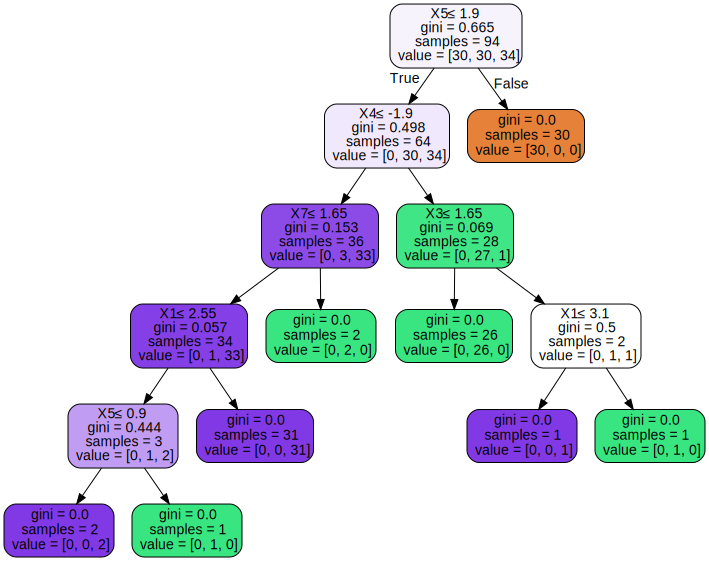

In [83]:
# #Visualize the Decision Tree which is formed on train dataset
dot_data = tree.export_graphviz(Iris_clf, out_file=None,  
                filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data) 
graph

**Validating our Decision Tree using cross validation method**

In [84]:
#As our model has been trained...
#Now we can validate our Decision Tree Using cross Validation method to get the accuracy or performance score of our model
print('Accuracy score is: ',cross_val_score(Iris_clf, Xt, Yt, cv=3, scoring='accuracy').mean()*100, '%')

Accuracy score is:  88.34005376344086 %


In [85]:
#Checking validation test data on our trained model and getting performance mentrics

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
Y_hat = Iris_clf.predict(Xcv)

print('Accuracy score for validation test data is:', accuracy_score(Ycv, Y_hat)*100, '%')
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy score for validation test data is: 90.9090909090909 %


array([[[10,  0],
        [ 0,  1]],

       [[ 4,  0],
        [ 1,  6]],

       [[ 7,  1],
        [ 0,  3]]])

In [86]:
#Checking our model performance on actual unseen test data..
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is :', accuracy_score(Ytest, YT_hat)*100, '%')
multilabel_confusion_matrix(Ytest, YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is : 95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 1, 12]],

       [[31,  1],
        [ 1, 12]]])

**Training model on Actual Train Data**

In [87]:
Iris_Fclf=DecisionTreeClassifier(criterion='gini', min_samples_split=2)
Iris_Fclf.fit(Xtrain, Ytrain)

DecisionTreeClassifier()

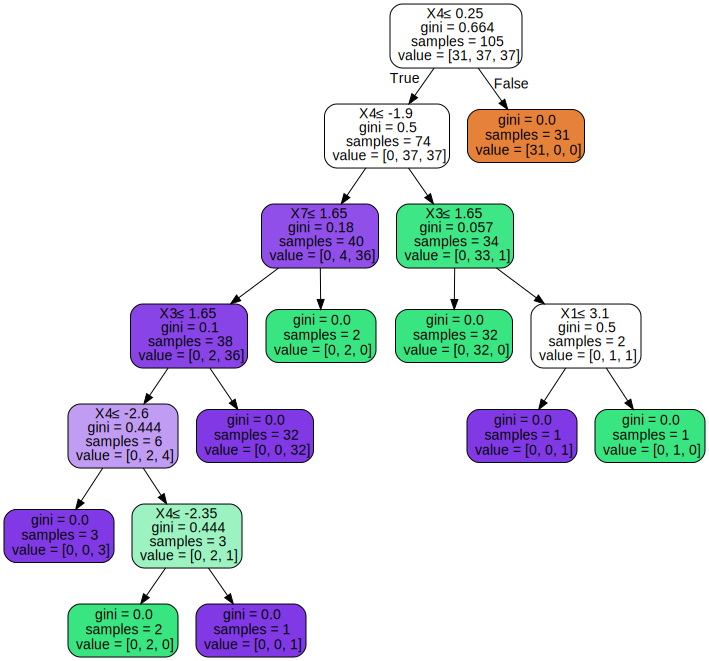

In [88]:
#Visualizing the final decision tree for deploying in real world cases...
dot_data = tree.export_graphviz(Iris_Fclf, out_file=None, filled=True, rounded=True,
                special_characters=True)
graph = graphviz.Source(dot_data)
graph

**Checking the performance of model on Actual Test data**

In [89]:
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is: ', accuracy_score(Ytest, YT_Fhat)*100, '%')
multilabel_confusion_matrix(Ytest, YT_Fhat)

Model Accuracy Score on totally unseen data(Xtest) is:  95.55555555555556 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 1, 12]],

       [[31,  1],
        [ 1, 12]]])

In [90]:
#Testing for New data points except from Dataset
import warnings
warnings.filterwarnings("ignore")
Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5, 2.0, 2.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3, 3.5, 1.0],
             [5.1,2.5,3.0,1.1,-0.5,1.4, 4.3, 2.0],
             [5.1,3.3,1.7,0.5,1.6,2.8, 0.0, 1.5],
             [6.0,2.7,5.1,1.6,-2.4,1.1, 2.7, 6.0],
             [6.0,2.2,5.0,1.5,-2.8,0.7, 4.2, 1.9]]

print(Iris_Fclf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor']


# THE END